## Build an agent:

In [19]:
import numpy as np

In [2]:
import minerl_training

In [3]:
def train_and_evaluate(agent: object, 
                       task: object, 
                       sum_writer: object, 
                       base_path: str, 
                       offset_episode_count: int = 0, 
                       nbr_max_observations: int = 1e7,
                       test_obs_interval: int = 1e4,
                       test_nbr_episode: int = 10,
                       benchmarking_record_episode_interval: int = None):
    return agent

In [4]:
minerl_training.train_and_evaluate = train_and_evaluate

In [5]:
agents, tasks = minerl_training.main()

/media/kevin/TOSHIBA_EXT1/DATA/UNI/MineRL/minerl/train/Regym/regym/tests/integration/MineRL/minerl_training.py:129: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  all_configs = yaml.load(open(config_file_path))


Path: -- MineRL_training/MineRLTreechop-v0/Seed13_venv_ppo_1actors_Sk4_St4_Obs84_NoGrayscale_NoScaling_PPOratio1m1_StdAdv_SingleRewardEpisode+P/ppo_LargeCNN_h128_b32 --


2020-01-18 12:48:30 kevin-PRIME-Z270-P minerl.env.malmo.instance.41519e[11883] INFO Starting Minecraft process: ['/tmp/tmp57dmgsud/Minecraft/launchClient.sh', '-port', '9001', '-env', '-runDir', '/tmp/tmp57dmgsud/Minecraft/run']
2020-01-18 12:48:30 kevin-PRIME-Z270-P minerl.env.malmo.instance.41519e[11883] INFO Starting process watcher for process 12423 @ localhost:9001
2020-01-18 12:49:25 kevin-PRIME-Z270-P minerl.env.malmo.instance.41519e[11883] INFO Minecraft process ready
2020-01-18 12:49:25 kevin-PRIME-Z270-P minerl.env.malmo[11883] INFO Logging output of Minecraft to ./logs/mc_1.log
2020-01-18 12:49:28 kevin-PRIME-Z270-P minerl.env.malmo[11883] INFO Minecraft process psutil.Process(pid=12423, status='terminated') terminated with exit code 0


CNN: layer output dim: 20
CNN: layer output dim: 10
CNN: layer output dim: 10
ActorCriticNet(
  (phi_body): ConvolutionalBody(
    (convs): ModuleList(
      (0): Conv2d(12, 32, kernel_size=(8, 8), stride=(4, 4), padding=(1, 1))
      (1): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    )
    (fcs): ModuleList(
      (0): Linear(in_features=6400, out_features=512, bias=True)
    )
  )
  (actor_body): DummyBody()
  (critic_body): DummyBody()
  (fc_action): Linear(in_features=512, out_features=5, bias=True)
  (fc_critic): Linear(in_features=512, out_features=1, bias=True)
)
phi_body.convs.0.weight torch.Size([32, 12, 8, 8])
phi_body.convs.0.bias torch.Size([32])
phi_body.convs.1.weight torch.Size([64, 32, 4, 4])
phi_body.convs.1.bias torch.Size([64])
phi_body.convs.2.weight torch.Size([64, 64, 3, 3])
phi_body.convs.2.bias torch.Size([64])
phi_body.fcs.0.weight torch.Size([512, 6400])
phi_bo

In [6]:
agent = agents[0]
task = tasks[0]

## Duplicate and parameterize the agents action sampling function:

In [7]:
EPS = 1e-8
VERBOSE = True 

def forward0(self, obs, action=None, rnn_states=None):
    global EPS
    global VERBOSE
    if VERBOSE:
        print("Sampling actions with function 0.")
    obs = tensor(obs)
    next_rnn_states = None 
    if rnn_states is not None:
        next_rnn_states = {k: None for k in rnn_states}

    if rnn_states is not None and 'phi_arch' in rnn_states:
        phi, next_rnn_states['phi_arch'] = self.network.phi_body( (obs, rnn_states['phi_arch']) )
    else:
        phi = self.network.phi_body(obs)

    if rnn_states is not None and 'actor_arch' in rnn_states:
        phi_a, next_rnn_states['actor_arch'] = self.network.actor_body( (phi, rnn_states['actor_arch']) )
    else:
        phi_a = self.network.actor_body(phi)

    if rnn_states is not None and 'critic_arch' in rnn_states:
        phi_v, next_rnn_states['critic_arch'] = self.network.critic_body( (phi, rnn_states['critic_arch']) )
    else:
        phi_v = self.network.critic_body(phi)

    logits = self.network.fc_action(phi_a)
    probs = F.softmax( logits, dim=-1 )
    #https://github.com/pytorch/pytorch/issues/7014
    #probs = torch.clamp(probs, -1e10, 1e10)

    # batch x action_dim
    v = self.network.fc_critic(phi_v)
    if self.use_intrinsic_critic:
        int_v = self.network.fc_int_critic(phi_v)
    # batch x 1

    batch_size = logits.size(0)

    '''
    # RND1
    # probs:
    dists = torch.distributions.categorical.Categorical(probs=probs)

    if action is None:
        action = dists.sample()#.unsqueeze(1)
        # batch #x 1
    log_prob = dists.log_prob(action)
    # batch #x 1
    entropy = dists.entropy().unsqueeze(1)
    # batch #x 1
    '''

    '''
    '''
    # NORMAL:
    #log_probs = F.log_softmax(logits, dim=-1)
    log_probs = torch.log(probs+EPS)
    entropy = -torch.sum(probs*log_probs, dim=-1)#, keepdim=True)
    # batch #x 1

    if action is None:
        #action = (probs+EPS).multinomial(num_samples=1).squeeze(1)
        action = torch.multinomial( probs, num_samples=1).squeeze(1)
        # batch #x 1
    log_probs = log_probs.gather(1, action.unsqueeze(1)).squeeze(1)
    # batch #x 1
    '''
    '''

    '''
    #RND2:
    # probs:
    log_probs = F.log_softmax(logits, dim=-1)
    #entropy = dists.entropy().unsqueeze(1)
    entropy = -(log_probs * probs).sum(1)#, keepdim=True)
    # batch #x 1

    if action is None:
        p = probs.detach().cpu().numpy()
        axis = 1
        r = np.expand_dims(np.random.rand(p.shape[1 - axis]), axis=axis)
        action = (p.cumsum(axis=axis) > r).argmax(axis=axis)
        action = torch.from_numpy(action).to(probs.device)
        # batch #x 1
    log_probs = log_probs.gather(1, action.unsqueeze(1)).squeeze(1)
    # batch #x 1
    '''

    prediction = {'a': action,
                'log_pi_a': log_probs,
                'action_logits': logits,
                'ent': entropy,
                'v': v}

    if self.use_intrinsic_critic:
        prediction['int_v'] = int_v

    if rnn_states is not None:
        prediction.update({'rnn_states': rnn_states,
                           'next_rnn_states': next_rnn_states})

    return prediction


def forward1(self, obs=None, action=None, rnn_states=None):
    global EPS
    global VERBOSE
    if VERBOSE:
        print("Sampling actions with function 1.")
    obs = tensor(obs)
    next_rnn_states = None 
    if rnn_states is not None:
        next_rnn_states = {k: None for k in rnn_states}

    if rnn_states is not None and 'phi_arch' in rnn_states:
        phi, next_rnn_states['phi_arch'] = self.network.phi_body( (obs, rnn_states['phi_arch']) )
    else:
        phi = self.network.phi_body(obs)

    if rnn_states is not None and 'actor_arch' in rnn_states:
        phi_a, next_rnn_states['actor_arch'] = self.network.actor_body( (phi, rnn_states['actor_arch']) )
    else:
        phi_a = self.network.actor_body(phi)

    if rnn_states is not None and 'critic_arch' in rnn_states:
        phi_v, next_rnn_states['critic_arch'] = self.network.critic_body( (phi, rnn_states['critic_arch']) )
    else:
        phi_v = self.network.critic_body(phi)

    logits = self.network.fc_action(phi_a)
    probs = F.softmax( logits, dim=-1 )
    #https://github.com/pytorch/pytorch/issues/7014
    #probs = torch.clamp(probs, -1e10, 1e10)

    # batch x action_dim
    v = self.network.fc_critic(phi_v)
    if self.use_intrinsic_critic:
        int_v = self.network.fc_int_critic(phi_v)
    # batch x 1

    batch_size = logits.size(0)

    '''
    '''
    # RND1
    # probs:
    dists = torch.distributions.categorical.Categorical(probs=probs)

    if action is None:
        action = dists.sample()#.unsqueeze(1)
        # batch #x 1
    log_prob = dists.log_prob(action)
    # batch #x 1
    entropy = dists.entropy().unsqueeze(1)
    # batch #x 1
    '''
    '''

    '''
    # NORMAL:
    #log_probs = F.log_softmax(logits, dim=-1)
    log_probs = torch.log(probs+EPS)
    entropy = -torch.sum(probs*log_probs, dim=-1)#, keepdim=True)
    # batch #x 1

    if action is None:
        #action = (probs+EPS).multinomial(num_samples=1).squeeze(1)
        action = torch.multinomial( probs, num_samples=1).squeeze(1)
        # batch #x 1
    log_probs = log_probs.gather(1, action.unsqueeze(1)).squeeze(1)
    # batch #x 1
    '''
    
    '''
    #RND2:
    # probs:
    log_probs = F.log_softmax(logits, dim=-1)
    #entropy = dists.entropy().unsqueeze(1)
    entropy = -(log_probs * probs).sum(1)#, keepdim=True)
    # batch #x 1

    if action is None:
        p = probs.detach().cpu().numpy()
        axis = 1
        r = np.expand_dims(np.random.rand(p.shape[1 - axis]), axis=axis)
        action = (p.cumsum(axis=axis) > r).argmax(axis=axis)
        action = torch.from_numpy(action).to(probs.device)
        # batch #x 1
    log_probs = log_probs.gather(1, action.unsqueeze(1)).squeeze(1)
    # batch #x 1
    '''

    prediction = {'a': action,
                'log_pi_a': log_probs,
                'action_logits': logits,
                'ent': entropy,
                'v': v}

    if self.use_intrinsic_critic:
        prediction['int_v'] = int_v

    if rnn_states is not None:
        prediction.update({'rnn_states': rnn_states,
                           'next_rnn_states': next_rnn_states})

    return prediction


def forward2(self, obs, action=None, rnn_states=None):
    global EPS
    global VERBOSE
    if VERBOSE:
        print("Sampling actions with function 2.")
    obs = tensor(obs)
    next_rnn_states = None 
    if rnn_states is not None:
        next_rnn_states = {k: None for k in rnn_states}

    if rnn_states is not None and 'phi_arch' in rnn_states:
        phi, next_rnn_states['phi_arch'] = self.network.phi_body( (obs, rnn_states['phi_arch']) )
    else:
        phi = self.network.phi_body(obs)

    if rnn_states is not None and 'actor_arch' in rnn_states:
        phi_a, next_rnn_states['actor_arch'] = self.network.actor_body( (phi, rnn_states['actor_arch']) )
    else:
        phi_a = self.network.actor_body(phi)

    if rnn_states is not None and 'critic_arch' in rnn_states:
        phi_v, next_rnn_states['critic_arch'] = self.network.critic_body( (phi, rnn_states['critic_arch']) )
    else:
        phi_v = self.network.critic_body(phi)

    logits = self.network.fc_action(phi_a)
    probs = F.softmax( logits, dim=-1 )
    #https://github.com/pytorch/pytorch/issues/7014
    #probs = torch.clamp(probs, -1e10, 1e10)

    # batch x action_dim
    v = self.network.fc_critic(phi_v)
    if self.use_intrinsic_critic:
        int_v = self.network.fc_int_critic(phi_v)
    # batch x 1

    batch_size = logits.size(0)

    '''
    # RND1
    # probs:
    dists = torch.distributions.categorical.Categorical(probs=probs)

    if action is None:
        action = dists.sample()#.unsqueeze(1)
        # batch #x 1
    log_prob = dists.log_prob(action)
    # batch #x 1
    entropy = dists.entropy().unsqueeze(1)
    # batch #x 1
    '''
    
    '''
    # NORMAL:
    #log_probs = F.log_softmax(logits, dim=-1)
    log_probs = torch.log(probs+EPS)
    entropy = -torch.sum(probs*log_probs, dim=-1)#, keepdim=True)
    # batch #x 1

    if action is None:
        #action = (probs+EPS).multinomial(num_samples=1).squeeze(1)
        action = torch.multinomial( probs, num_samples=1).squeeze(1)
        # batch #x 1
    log_probs = log_probs.gather(1, action.unsqueeze(1)).squeeze(1)
    # batch #x 1
    '''
    
    '''
    '''
    #RND2:
    # probs:
    log_probs = F.log_softmax(logits, dim=-1)
    #entropy = dists.entropy().unsqueeze(1)
    entropy = -(log_probs * probs).sum(1)#, keepdim=True)
    # batch #x 1

    if action is None:
        p = probs.detach().cpu().numpy()
        axis = 1
        r = np.expand_dims(np.random.rand(p.shape[1 - axis]), axis=axis)
        action = (p.cumsum(axis=axis) > r).argmax(axis=axis)
        action = torch.from_numpy(action).to(probs.device)
        # batch #x 1
    log_probs = log_probs.gather(1, action.unsqueeze(1)).squeeze(1)
    # batch #x 1
    '''
    '''

    prediction = {'a': action,
                'log_pi_a': log_probs,
                'action_logits': logits,
                'ent': entropy,
                'v': v}

    if self.use_intrinsic_critic:
        prediction['int_v'] = int_v

    if rnn_states is not None:
        prediction.update({'rnn_states': rnn_states,
                           'next_rnn_states': next_rnn_states})

    return prediction



In [8]:
agents.append(agent.clone())
agents.append(agent.clone())

In [9]:
agents[1].algorithm.model.forward = forward1

In [10]:
agents[2].algorithm.model.forward = forward2

## Issue with nn.Module's __call__ function:

In [28]:
class A0(object):
    def forward(self, *input, **kwargs):
        raise NotImplemented
        
    def __call__(self, *input, **kwargs):
        #return self.forward(*[self,*input],**kwargs)
        return self.forward(*input,**kwargs)
    
class A(A0):
    def forward(self, obs, action=None):
        print(self, obs, action)
        return 1

instA = A()

def hfn(self, obs, action=None):
    print(self,obs, action)
    return 0

instA.forward = hfn

assert( instA(1) == 0)

TypeError: hfn() missing 1 required positional argument: 'obs'

> <ipython-input-28-c150166465e4>(7)__call__()
      5     def __call__(self, *input, **kwargs):
      6         #return self.forward(*[self,*input],**kwargs)
----> 7         return self.forward(*input,**kwargs)
      8 
      9 class A(A0):

ipdb> pp input
(1,)
ipdb> pp *input
*** SyntaxError: invalid syntax
ipdb> print( *input)
1
ipdb> exit


In [25]:
import torch
import torch.nn as nn

def original_fn(self, *input, **kwargs):
     for hook in self._forward_pre_hooks.values():
         result = hook(self, input)
         if result is not None:
             if not isinstance(result, tuple):
                 result = (result,)
             input = result
     if torch._C._get_tracing_state():
         result = self._slow_forward(*input, **kwargs)
     else:
         result = self.forward(*input, **kwargs)
     for hook in self._forward_hooks.values():
         hook_result = hook(self, input, result)
         if hook_result is not None:
             result = hook_result
     if len(self._backward_hooks) > 0:
         var = result
         while not isinstance(var, torch.Tensor):
             if isinstance(var, dict):
                 var = next((v for v in var.values() if isinstance(v, torch.Tensor)))
             else:
                 var = var[0]
         grad_fn = var.grad_fn
         if grad_fn is not None:
             for hook in self._backward_hooks.values():
                 wrapper = functools.partial(hook, self)
                 functools.update_wrapper(wrapper, hook)
                 grad_fn.register_hook(wrapper)
     return result

def hook_fn(self, *input, **kwargs):
     for hook in self._forward_pre_hooks.values():
         result = hook(self, input)
         if result is not None:
             if not isinstance(result, tuple):
                 result = (result,)
             input = result
     if torch._C._get_tracing_state():
         result = self._slow_forward(*input, **kwargs)
     else:
         result = self.forward(*[self,*input], **kwargs)
     for hook in self._forward_hooks.values():
         hook_result = hook(self, input, result)
         if hook_result is not None:
             result = hook_result
     if len(self._backward_hooks) > 0:
         var = result
         while not isinstance(var, torch.Tensor):
             if isinstance(var, dict):
                 var = next((v for v in var.values() if isinstance(v, torch.Tensor)))
             else:
                 var = var[0]
         grad_fn = var.grad_fn
         if grad_fn is not None:
             for hook in self._backward_hooks.values():
                 wrapper = functools.partial(hook, self)
                 functools.update_wrapper(wrapper, hook)
                 grad_fn.register_hook(wrapper)
     return result

#nn.Module.__call__ = hook_fn
nn.Module.__call__ = original_fn

### Testing the sampling functions:

In [13]:
observation = task.env.observation_space.sample() #task.env.reset()

2020-01-18 12:50:07 kevin-PRIME-Z270-P minerl.env.malmo.instance.2319da[11883] INFO Starting Minecraft process: ['/tmp/tmpsqdinwrn/Minecraft/launchClient.sh', '-port', '9002', '-env', '-runDir', '/tmp/tmpsqdinwrn/Minecraft/run']
2020-01-18 12:50:08 kevin-PRIME-Z270-P minerl.env.malmo.instance.2319da[11883] INFO Starting process watcher for process 12898 @ localhost:9002
2020-01-18 12:50:44 kevin-PRIME-Z270-P minerl.env.malmo.instance.2319da[11883] INFO Minecraft process ready
2020-01-18 12:50:44 kevin-PRIME-Z270-P minerl.env.malmo[11883] INFO Logging output of Minecraft to ./logs/mc_2.log


In [14]:
print(observation.shape, observation.min(), observation.max())

(84, 84, 12) 0.0032628728 254.99591


In [15]:
%matplotlib inline  
import matplotlib.pyplot as plt

(84, 84, 3)


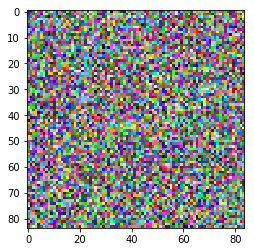

In [16]:
test_obs = observation[...,:3]/255.0
print(test_obs.shape)
plt.imshow(test_obs)

In [17]:
robs = task.env.reset()

In [20]:
a = task.env.action_space.sample()
obs, r, done, info = task.env.step(np.array([a]))

(1, 84, 84, 12) 8.0 207.0


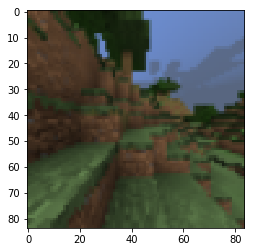

In [21]:
print(robs.shape, robs.min(), robs.max())
plt.imshow(robs[0,...,:3]/255.0)

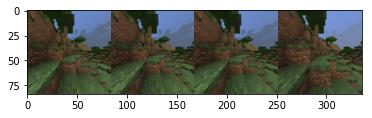

In [22]:
def lineup(obs):
    lineupobs = np.concatenate([obs[0,...,i:i+3] for i in range(0,12,3)], axis=1)
    return lineupobs
plt.imshow(lineup(obs)/255.0)

### Sampling from each agents:

In [23]:
%pdb

Automatic pdb calling has been turned ON


In [26]:
actions = []
for id, agent in enumerate(agents): 
    #try:
    a = agent.take_action(obs)
    actions.append(a)
    #except Exception as e:
    #    print(f'Agent {id} : {e}')

Sampling actions with function 1.


NameError: name 'tensor' is not defined

> <ipython-input-7-b255727724d3>(113)forward1()
    111     if VERBOSE:
    112         print("Sampling actions with function 1.")
--> 113     obs = tensor(obs)
    114     next_rnn_states = None
    115     if rnn_states is not None:

ipdb> pp self
tensor([[[[0.4157, 0.3779, 0.4077,  ..., 0.4039, 0.4039, 0.4039],
          [0.3880, 0.3501, 0.3779,  ..., 0.4039, 0.4039, 0.4039],
          [0.2868, 0.3062, 0.3465,  ..., 0.4039, 0.4034, 0.4023],
          ...,
          [0.2392, 0.2797, 0.3205,  ..., 0.2372, 0.2474, 0.2601],
          [0.2770, 0.3217, 0.3475,  ..., 0.2755, 0.2803, 0.2964],
          [0.3451, 0.3476, 0.3490,  ..., 0.2874, 0.2812, 0.3216]],

         [[0.2980, 0.2703, 0.2914,  ..., 0.5153, 0.5137, 0.5137],
          [0.2779, 0.2501, 0.2702,  ..., 0.5143, 0.5137, 0.5137],
          [0.2556, 0.2360, 0.2465,  ..., 0.5128, 0.5121, 0.5121],
          ...,
          [0.3121, 0.3657, 0.4189,  ..., 0.2512, 0.2230, 0.2358],
          [0.3627, 0.4204, 0.4540,  ..., 0.2982, 0.2355, 0

In [56]:
print(actions)

[array([3]), array([0])]


1
